# Problem Statement of Sentiment and Recommondation Analysis

e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

Build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

Task is to recommend 20 products that a user is most likely to purchase based on the ratings. You can use the 'reviews_username' (one of the columns in the dataset) to identify your user.

And Deployment of this end to end project with a user interface.

## Aim of This Notebook

Aim of this notebook is data understanding, preparation and exploration. In this notebook, I will download data, merge another column from different dataset and try to understand the columns interactions with each others and target with the help of visualizations. I will also discover which columns need to clean. Then, I will prepare my data to modeling. 

At the end of the this notebook, all explorations and findings which are obtained from the first look of the data, can be found as a list.

# Importing Necessary Libraries

In [132]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics.pairwise as pw
from sklearn.metrics.pairwise import pairwise_distances

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords

# XGBoost and LGBM classifier imports
import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier


In [2]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

# Importing Data from .csv

In [3]:
df = pd.read_csv('C:\\Users\\swammy\\Downloads\\sample30.csv') #getting main data
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names

In [4]:
df.head() #first look to df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
df.shape #to see the number of columns and rows

(30000, 15)

In [6]:
df.isna().sum() #to see null values

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

Most important columns for my project are overall and reviewText. So I have to drop the nulls for these two columns.

In [7]:
df.dropna(subset=['reviews_title'], inplace=True) #droping null's in reviews
df.dropna(subset=['user_sentiment'], inplace=True) #droping null's in reviews

In [8]:
df.isna().sum() # to check

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     13877
reviews_doRecommend      2404
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        27881
reviews_userProvince    29642
reviews_username           62
user_sentiment              0
dtype: int64

# Deeper Look to Columns

To decide cleaning and preparing process, I will look deeper to columns.

In [9]:
df.info(verbose=True, null_counts=True) #to see the type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29809 non-null  object
 1   brand                 29809 non-null  object
 2   categories            29809 non-null  object
 3   manufacturer          29668 non-null  object
 4   name                  29809 non-null  object
 5   reviews_date          29763 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27405 non-null  object
 8   reviews_rating        29809 non-null  int64 
 9   reviews_text          29809 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1928 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  reviews_username      29747 non-null  object
 14  user_sentiment        29809 non-null  object
dtypes: int64(1), object(14)
memory usage

In [10]:
df['reviews_rating'].value_counts() 

5    20691
4     6002
1     1372
3     1333
2      411
Name: reviews_rating, dtype: int64

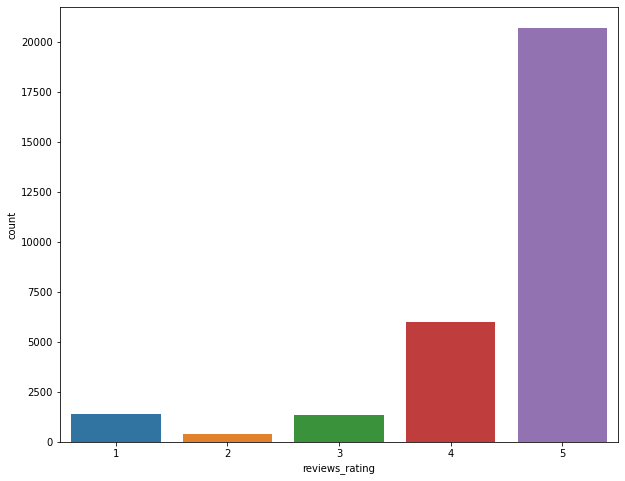

In [11]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', data=df)

Mostly ratings in dataset consist of good reviews such as 4 and 5. It is seen that our target is imbalanced.

## Lets check with Date of Reviews

In [12]:
df['reviews_date'].nunique()

6711

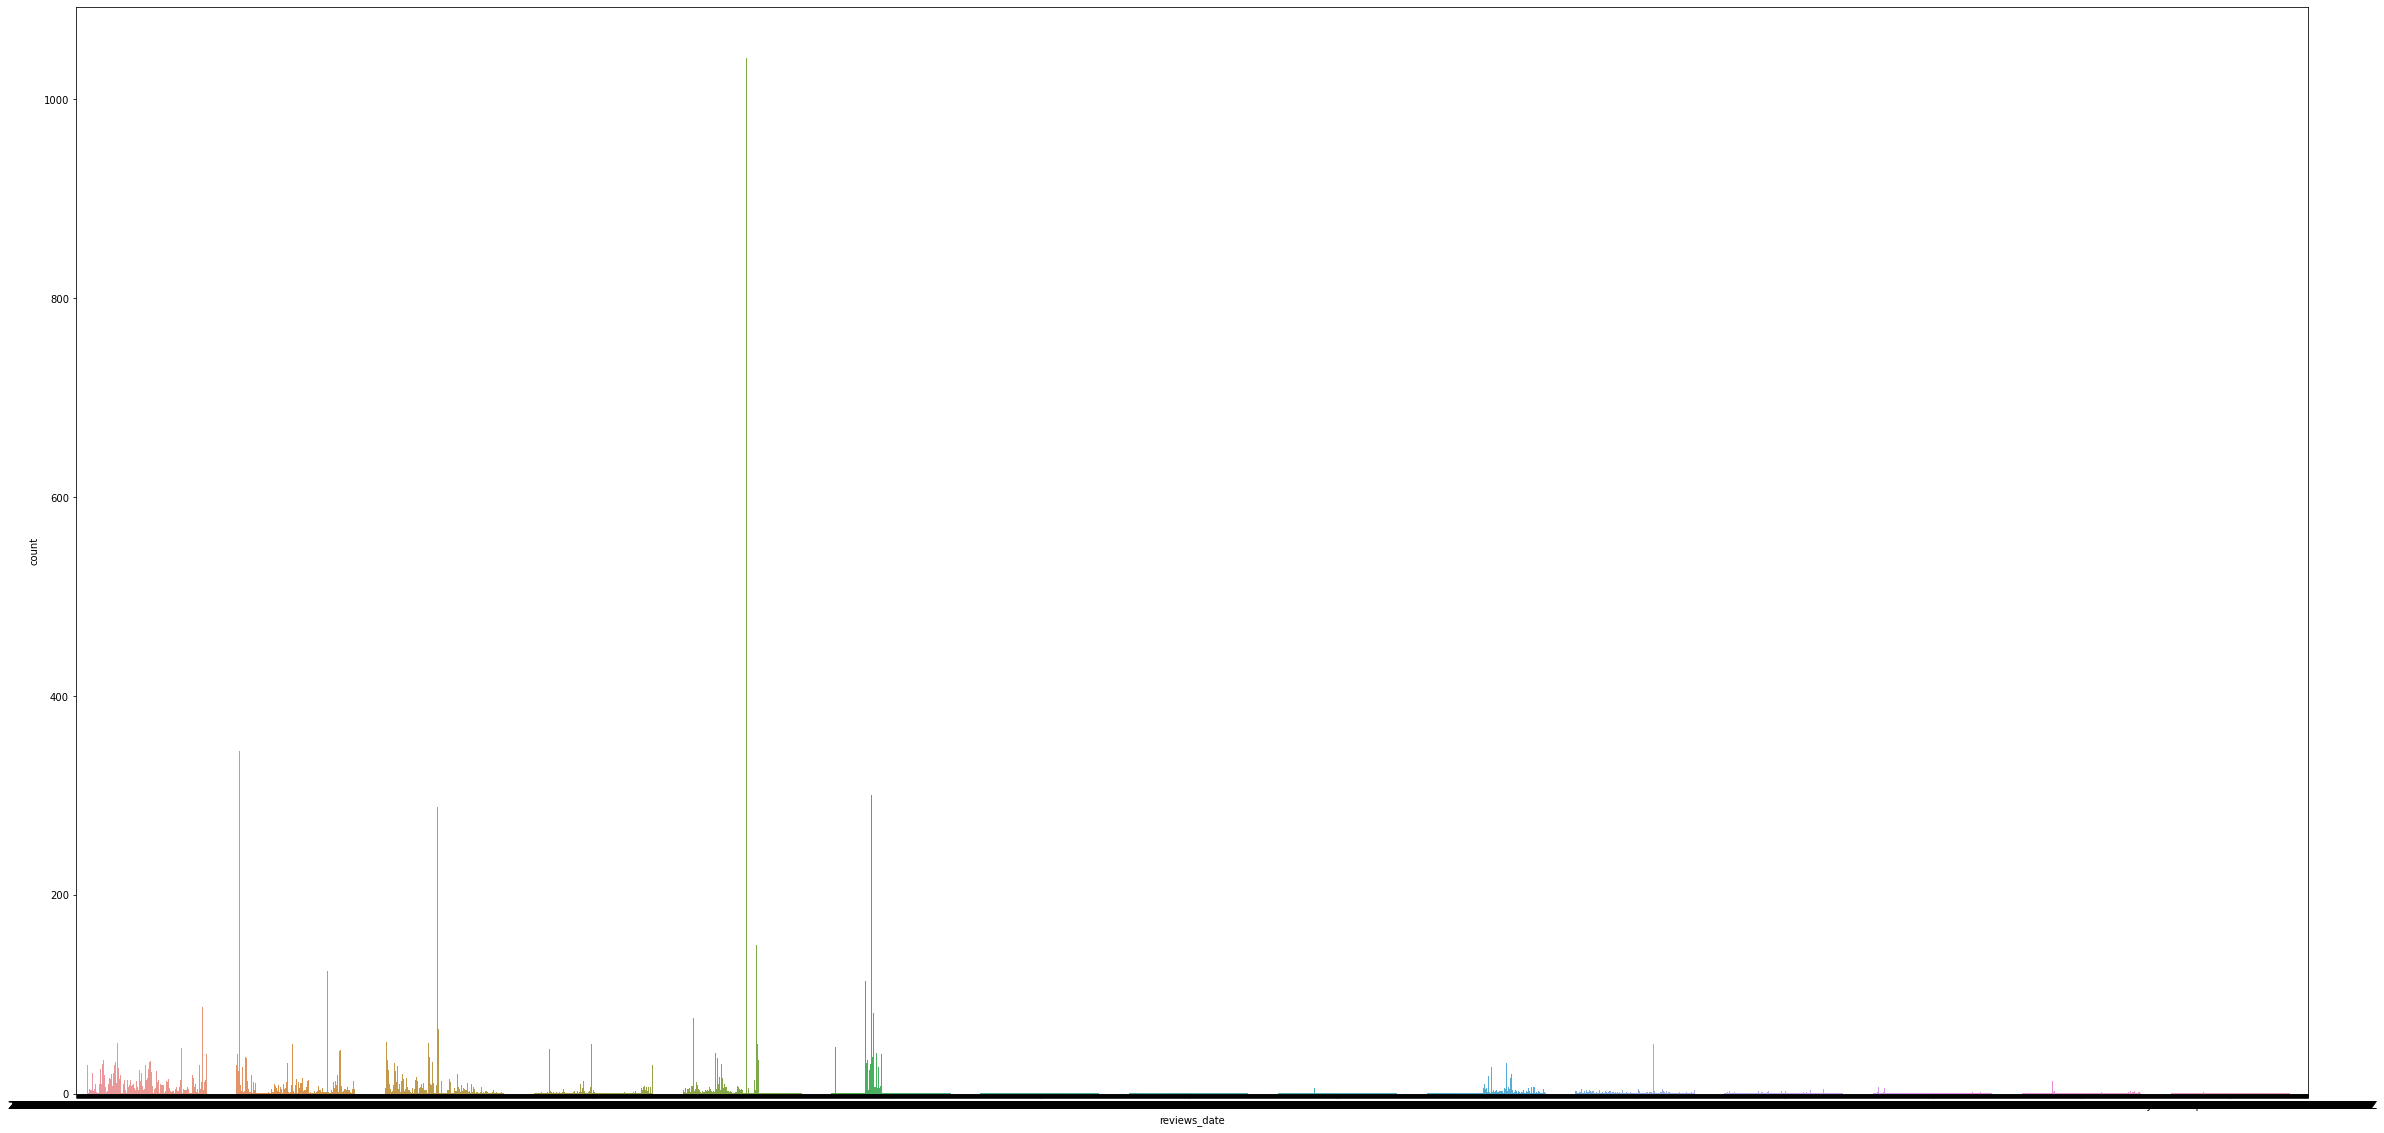

In [13]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x='reviews_date',data=df)

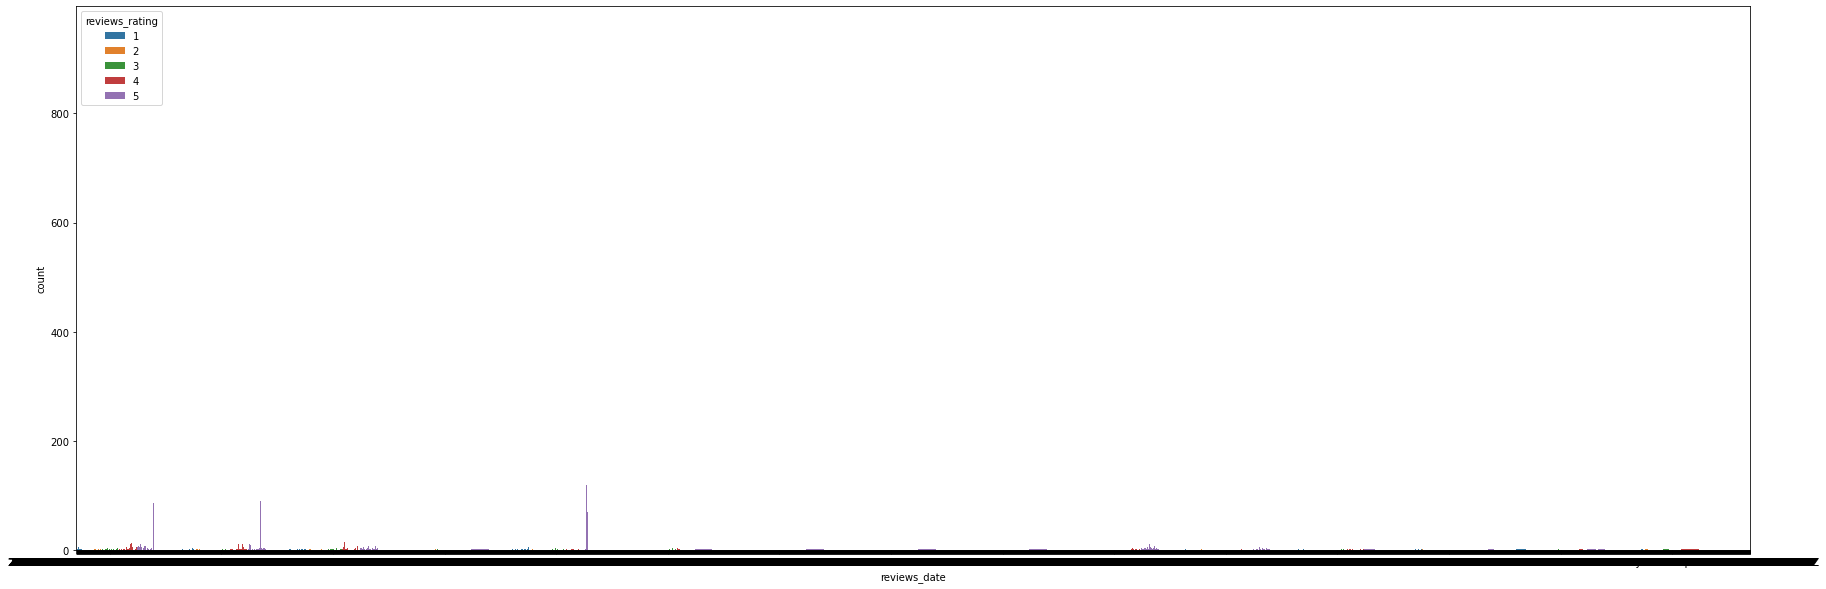

In [14]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='reviews_date', hue="reviews_rating", data=df)

According to plots above, our data distribution is nearly same for each day, except 31st. Because, every month do not have 31th day. This is also a good indicator for reliability for our data.

### Looking to Reviewers

In [15]:
df['id'].nunique()

252

There are 252 different ID for reviews in this data.

In [16]:
df['reviews_username'].nunique()

24787

Normally, reviewer ID must be same reviewer name but name is less than ID. It means that some people use same names with each other. So, reviewer ID column contains more information than name column. So, I will drop this column. 

In [17]:
df.drop(columns=['reviews_username'],inplace=True) #droping reviewername column

### Looking to Reviewers According to Ratings and Rated Products

Top 100 head rating averages are 5. But, it does not give good idea to us. Because maybe they just rated 5 products as 5. But, there are many user which rated more than 500 products.

In [18]:
df.groupby('id')['brand'].count().sort_values(ascending=False).head(100)

id
AVpf3VOfilAPnD_xjpun    8544
AVpfPaoqLJeJML435Xk9    3324
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1139
                        ... 
AVpe6CHv1cnluZ0-ZhwN      15
AVpf9_3MLJeJML43GvdB      15
AVpe7GIELJeJML43yZfu      15
AV1h6Gu0glJLPUi8IjA_      14
AV1YqAaMGV-KLJ3adiDj      14
Name: brand, Length: 100, dtype: int64

### Looking to Top 3 User According to Review Number

In [19]:
df.loc[df['id']=='AVpf3VOfilAPnD_xjpun'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      16
2      11
3      71
4    1295
5    7151
Name: brand, dtype: int64

In [20]:
df.loc[df['id']=='AVpfPaoqLJeJML435Xk9'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      37
2      57
3     348
4    1143
5    1739
Name: brand, dtype: int64

In [21]:
df.loc[df['id']=='AVpfJP1C1cnluZ0-e3Xy'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      13
2       1
3      16
4     239
5    1770
Name: brand, dtype: int64

In [22]:
df['brand'].nunique() #showing number of books in data

199

In [23]:
df.groupby('brand')['reviews_rating'].mean().sort_values(ascending=False).head(10)

brand
4C Foods                5.0
Tim Holtz               5.0
Dermalogica             5.0
Pinaud                  5.0
Fiskars                 5.0
Happy Family            5.0
Stonyfield              5.0
Heinz                   5.0
Hortense B. Hewitt      5.0
Southern Enterprises    5.0
Name: reviews_rating, dtype: float64

In [24]:
df['brand'].value_counts().head(10)

Clorox                  10584
Warner Home Video        3324
Disney                   1196
L'oreal Paris            1186
FOX                       887
Burt's Bees               881
Sony Pictures             845
Summit Entertainment      813
Nexxus                    691
Universal Home Video      668
Name: brand, dtype: int64

In [25]:
df.loc[df['brand']=='4C Foods'].groupby('reviews_rating').count() # according to review avg.

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment
reviews_rating,,,,,,,,,,,,,
5,6,6,6,6,6,6,6,6,6,6,0,0,6


Only 6 reviews but all is 5.0.

In [26]:
df.loc[df['brand']=='Clorox'].groupby('reviews_rating').count() # according to review number

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment
reviews_rating,,,,,,,,,,,,,
1,29,29,29,29,29,29,20,20,29,29,4,1,29
2,12,12,12,12,12,12,9,11,12,12,0,0,12
3,87,87,87,87,87,87,68,86,87,87,5,0,87
4,1534,1534,1534,1534,1534,1534,1183,1532,1534,1534,140,2,1534
5,8922,8922,8922,8922,8922,8922,7009,8874,8922,8922,870,15,8922


Total 10584 reviews but 3.6% rated as 1 and 2.

When we compare our two results, sorting products according to review numbers is shown more reliable than looking to the average of ratings. So, we will analyze and compare mostly reviewed products.  

## Top 10 Highly Reviewed Products

In [27]:
df.loc[df['brand']=='Universal Home Video'].groupby('name').mean() # run this for 10 different asin values

,reviews_rating
name,
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),4.491018


In [28]:
df_products = pd.DataFrame(columns=["ProdName", "Rating #",'Rating Avg.']) # result df for showing books together
df_products

,ProdName,Rating #,Rating Avg.


In [29]:
# writing findings to df
df_products = df_products.append({     
     "ProdName": 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total ' ,
      "Rating #": 10584 , 
       'Rating Avg.' : 4.82}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd' ,
      "Rating #": 3324 , 
       'Rating Avg.' : 4.35}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": 'Doc Mcstuffins: Friendship Is The Best Medicine' ,
      "Rating #": 1196 , 
       'Rating Avg.' : 4.91}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": 'L\'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz' ,
      "Rating #": 1186 , 
       'Rating Avg.' : 4.02}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": 'There\'s Something About Mary (dvd)' ,
      "Rating #": 887 , 
       'Rating Avg.' : 4.52}, ignore_index=True)

In [30]:
df_products = df_products.append({     
     "ProdName": 'Burt\'s Bees Lip Shimmer, Raisin' ,
      "Rating #": 881 , 
       'Rating Avg.' : 4.65}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": 'The Resident Evil Collection 5 Discs (blu-Ray)' ,
      "Rating #": 845 , 
       'Rating Avg.' : 4.67}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": "Red (special Edition) (dvdvideo)" ,
      "Rating #": 813 , 
       'Rating Avg.' : 4.65}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": "Nexxus Exxtra Gel Style Creation Sculptor" ,
      "Rating #": 691 , 
       'Rating Avg.' : 1.34}, ignore_index=True)
df_products = df_products.append({     
     "ProdName": "My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)" ,
      "Rating #": 668 , 
       'Rating Avg.' : 4.49}, ignore_index=True)

In [31]:
df_products

,ProdName,Rating #,Rating Avg.
0,Clorox Disinfecting Wipes Value Pack Scented 1...,10584,4.82
1,Godzilla 3d Includes Digital Copy Ultraviolet ...,3324,4.35
2,Doc Mcstuffins: Friendship Is The Best Medicine,1196,4.91
3,L'or233al Paris Elvive Extraordinary Clay Reba...,1186,4.02
4,There's Something About Mary (dvd),887,4.52
5,"Burt's Bees Lip Shimmer, Raisin",881,4.65
6,The Resident Evil Collection 5 Discs (blu-Ray),845,4.67
7,Red (special Edition) (dvdvideo),813,4.65
8,Nexxus Exxtra Gel Style Creation Sculptor,691,1.34
9,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,668,4.49


[Text(0, 0, 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total '),
 Text(0, 0, 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd'),
 Text(0, 0, 'Doc Mcstuffins: Friendship Is The Best Medicine'),
 Text(0, 0, "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"),
 Text(0, 0, "There's Something About Mary (dvd)"),
 Text(0, 0, "Burt's Bees Lip Shimmer, Raisin"),
 Text(0, 0, 'The Resident Evil Collection 5 Discs (blu-Ray)'),
 Text(0, 0, 'Red (special Edition) (dvdvideo)'),
 Text(0, 0, 'Nexxus Exxtra Gel Style Creation Sculptor'),
 Text(0, 0, 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)')]

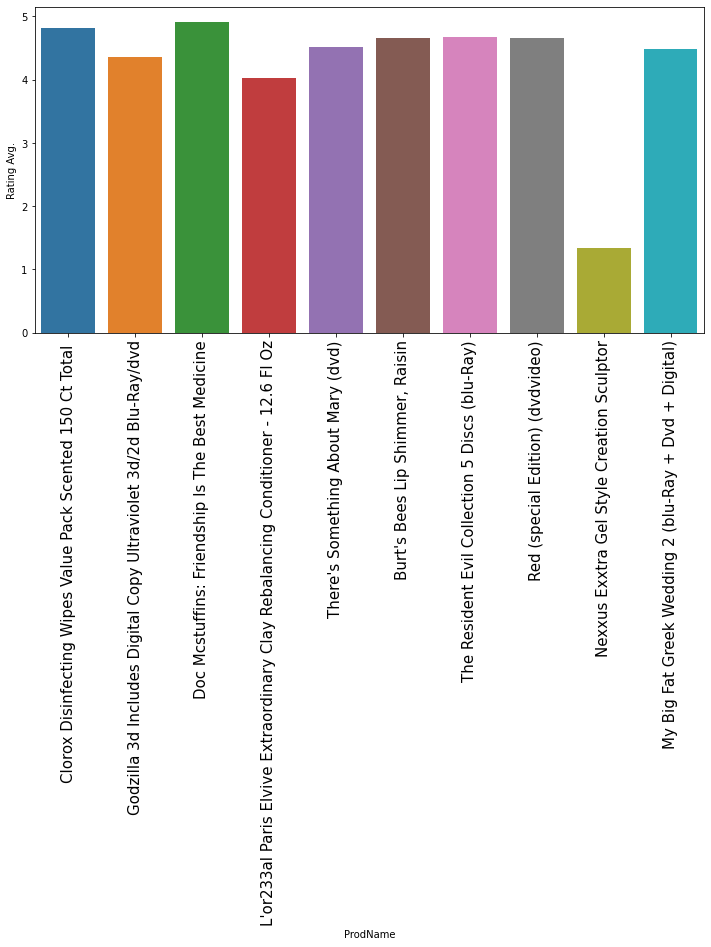

In [32]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='ProdName', y="Rating Avg.",data=df_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

[Text(0, 0, 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total '),
 Text(0, 0, 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd'),
 Text(0, 0, 'Doc Mcstuffins: Friendship Is The Best Medicine'),
 Text(0, 0, "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"),
 Text(0, 0, "There's Something About Mary (dvd)"),
 Text(0, 0, "Burt's Bees Lip Shimmer, Raisin"),
 Text(0, 0, 'The Resident Evil Collection 5 Discs (blu-Ray)'),
 Text(0, 0, 'Red (special Edition) (dvdvideo)'),
 Text(0, 0, 'Nexxus Exxtra Gel Style Creation Sculptor'),
 Text(0, 0, 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)')]

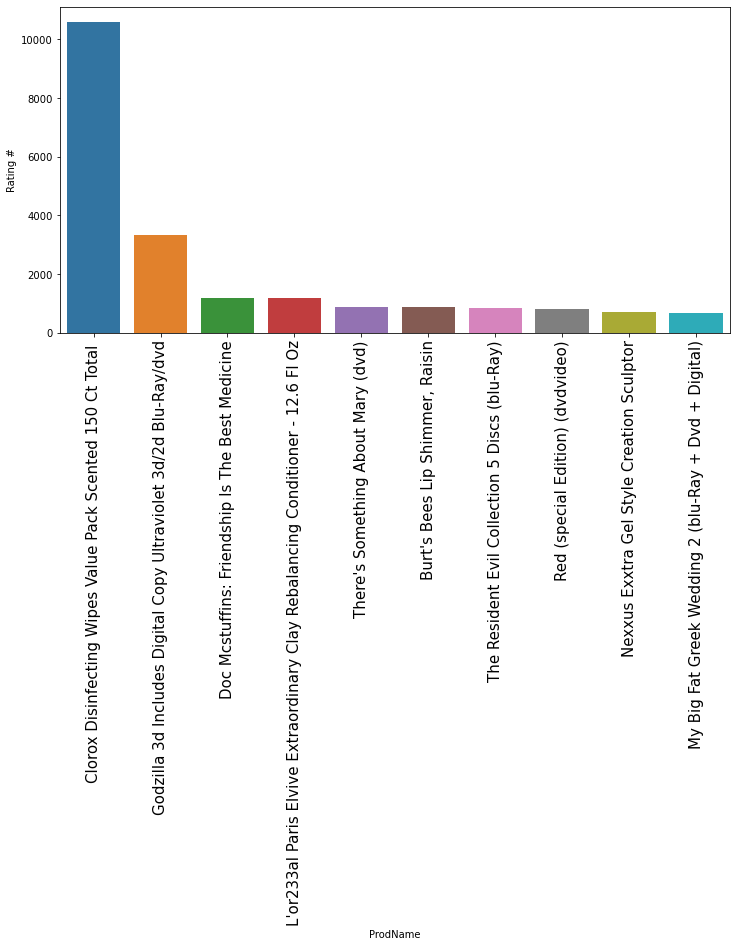

In [33]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='ProdName', y="Rating #",data=df_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

# Looking at Products According to 'title' Column (based on # of reviews)

In [34]:
df['reviews_title'].value_counts().head(10)

Great Product    384
Great movie      361
Clorox Wipes     278
Great            221
Great product    205
Good movie       195
Awesome          186
Great Movie      156
great product    140
great movie      139
Name: reviews_title, dtype: int64

When I look at the top 10 highest review numbers, I realized this list is different than product ID's list. I realized that some products have series but as title they were written as same. Also, there are different products with same names. So, finding a title according to Product ID is more reliable way from just looking at titles.

## 2. Data Cleaning

In [35]:
df_columns = df[['reviews_title', 'reviews_text', 'user_sentiment']]
df_columns.head()

,reviews_title,reviews_text,user_sentiment
0,Just Awesome,i love this album. it's very good. more to the...,Positive
1,Good,Good flavor. This review was collected as part...,Positive
2,Good,Good flavor.,Positive
3,Disappointed,I read through the reviews on here before look...,Negative
4,Irritation,My husband bought this gel for us. The gel cau...,Negative


In [36]:
df.user_sentiment.value_counts(normalize=True)

Positive    0.887786
Negative    0.112214
Name: user_sentiment, dtype: float64

# Word Clouds

Word clouds are the easiest way of looking the most popular or characteristic words in the text. To see the difference of words between positive,negative and neutral reviews, I will build three word clouds.  

In [37]:
df.info(verbose=True, null_counts=True) #to see the # of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29809 non-null  object
 1   brand                 29809 non-null  object
 2   categories            29809 non-null  object
 3   manufacturer          29668 non-null  object
 4   name                  29809 non-null  object
 5   reviews_date          29763 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27405 non-null  object
 8   reviews_rating        29809 non-null  int64 
 9   reviews_text          29809 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1928 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  user_sentiment        29809 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.7+ MB


To classify the positive or negative reviews, I will collect 4 and 5 ratingd together as positives and encode them as 2. I will encode rating 3 as 0 and rating 1 and 2 as 1.

In [38]:
def calculate_sentiment_with_neutral(reviews_rating):
    '''encoding the sentiments of the ratings.'''
    if reviews_rating == 5 or reviews_rating == 4:
        return 2
    elif reviews_rating == 1 or reviews_rating==2 : 
        return 0
    else:
        return 1

In [39]:
df['user_sentiment'] = df['reviews_rating'].apply(calculate_sentiment_with_neutral) #applyind function

In [40]:
df.groupby(['user_sentiment','reviews_rating']).count()

id  brand  categories  manufacturer   name  \
user_sentiment reviews_rating                                                  
0              1                1372   1372        1372          1370   1372   
               2                 411    411         411           409    411   
1              3                1333   1333        1333          1316   1333   
2              4                6002   6002        6002          5947   6002   
               5               20691  20691       20691         20626  20691   

                               reviews_date  reviews_didPurchase  \
user_sentiment reviews_rating                                      
0              1                       1370                  828   
               2                        404                  183   
1              3                       1326                  446   
2              4                       5997                 2449   
               5                      20666                12026   

                               reviews_doRecommend  reviews_text  \
user_sentiment reviews_rating                                      
0              1                               886          1372   
               2                               294           411   
1              3                              1147          1333   
2              4                              5690          6002   
               5                             19388         20691   

                               reviews_title  reviews_userCity  \
user_sentiment reviews_rating                                    
0              1                        1372               190   
               2                         411                33   
1              3                        1333                77   
2              4                        6002               442   
               5                       20691              1186   

                               reviews_userProvince  
user_sentiment reviews_rating                        
0              1                                 52  
               2                                  9  
1              3                                 11  
2              4                                 36  
               5                                 59

From chart above, we can check how the overall ratings classified and encoded.

In [41]:
df['user_sentiment'].value_counts() #number of new sentiments

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

# Preprocessing the Reviews

For computers, 'Products' is not same word with 'products'. So, I will do every letter in the text lowercase. And, clean the punctuations from text to make them more accurate for my model.

In [42]:
df['reviews_text']=df['reviews_text'].str.lower() # to make all letters lower

In [43]:
df['reviews_text'] #check lower

0        i love this album. it's very good. more to the...
1        good flavor. this review was collected as part...
2                                             good flavor.
3        i read through the reviews on here before look...
4        my husband bought this gel for us. the gel cau...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it , i received this for review purpose...
29997    first of all i love the smell of this product....
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: reviews_text, Length: 29809, dtype: object

In [44]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [46]:
#removing punctions
df['review_clean'] = df['reviews_text'].apply(lambda x: remove_punctuation(x))
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment,review_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,2,i love this album its very good more to the hi...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,good flavor. this review was collected as part...,Good,NaN,NaN,2,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,good flavor.,Good,NaN,NaN,2,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,i read through the reviews on here before look...,Disappointed,NaN,NaN,0,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,my husband bought this gel for us. the gel cau...,Irritation,NaN,NaN,0,my husband bought this gel for us the gel caus...


When I look at the clean text and original text, I can check the punctuations were removed.

In [47]:
df['review_clean'][3]

'i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation we had both been expecting im disappointed that i paid as much as i did for a lube that i wont use again when i could just use their normal personal lubricant for 1 less money and 2 less mess'

In [48]:
df['reviews_text'][3]

"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. it was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. i'm disappointed that i paid as much as i did for a lube that i won't use again, when i could just use their normal personal lubricant for 1) less money and 2) less mess."

To compare the most common words in positive, negative and neutral, I will divide dataframe as positive, negative and neutral based on sentiments.

In [49]:
df_pos = df.loc[df['user_sentiment']==2] # positive reviews dataframe

In [50]:
df_neg = df.loc[df['user_sentiment']==0] # negative reviews dataframe

In [51]:
df_notr = df.loc[df['user_sentiment']==1] # neutral reviews dataframe

In [52]:
stop_words = set(STOPWORDS) # setting stop words

In [53]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)

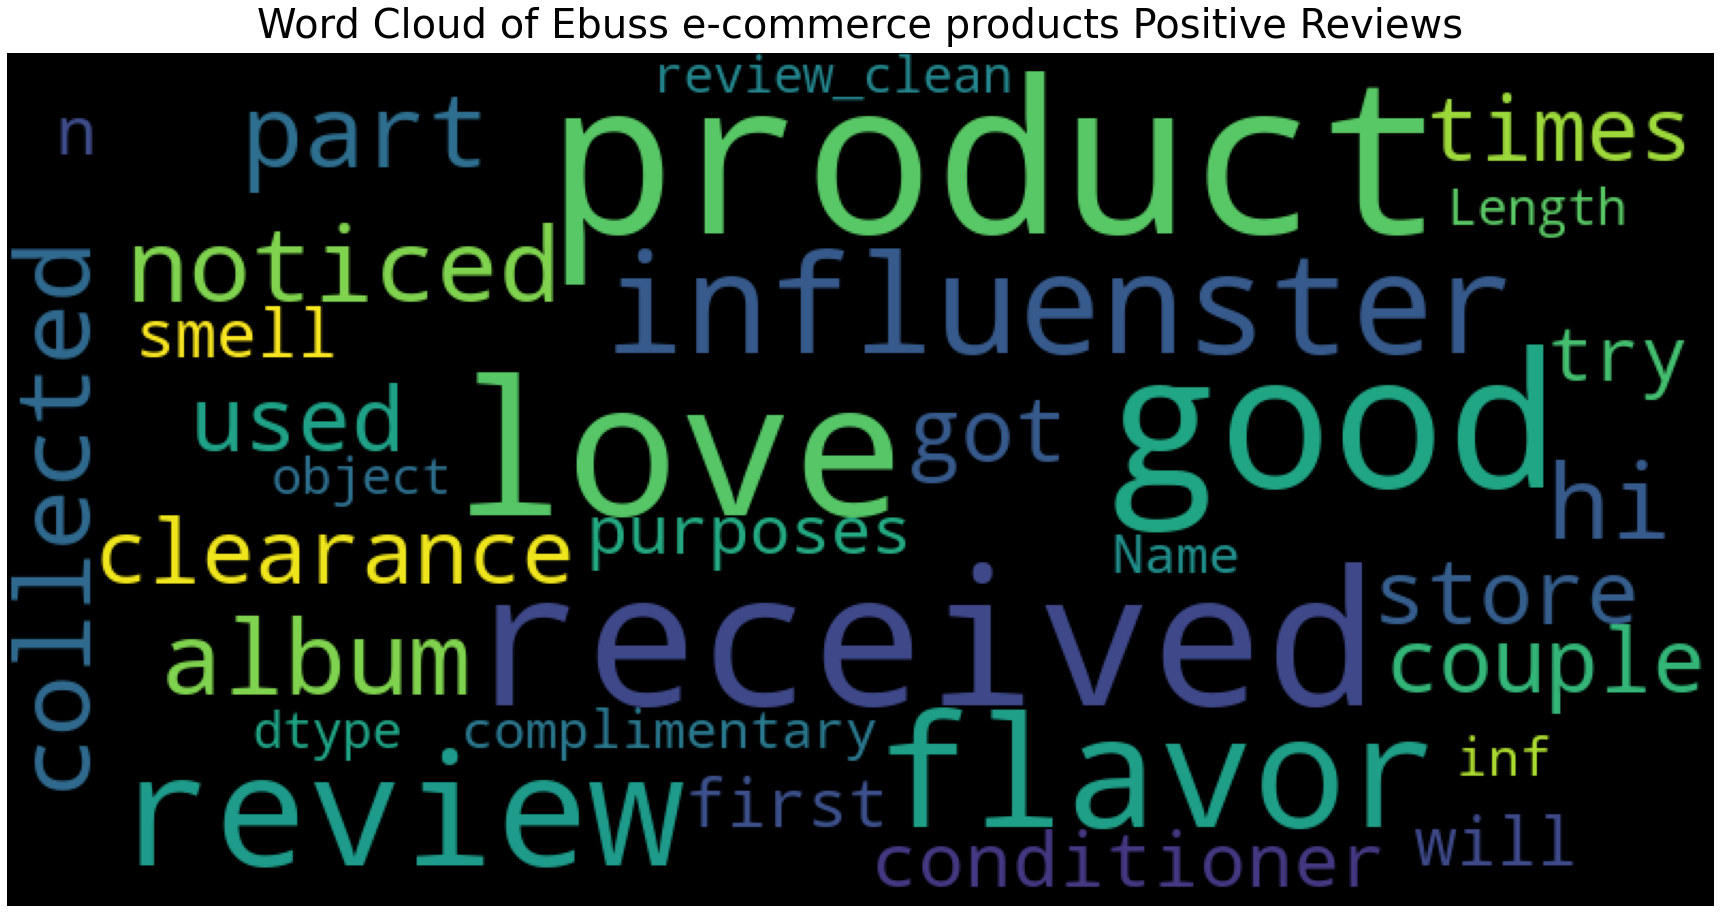

In [54]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Ebuss e-commerce products Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

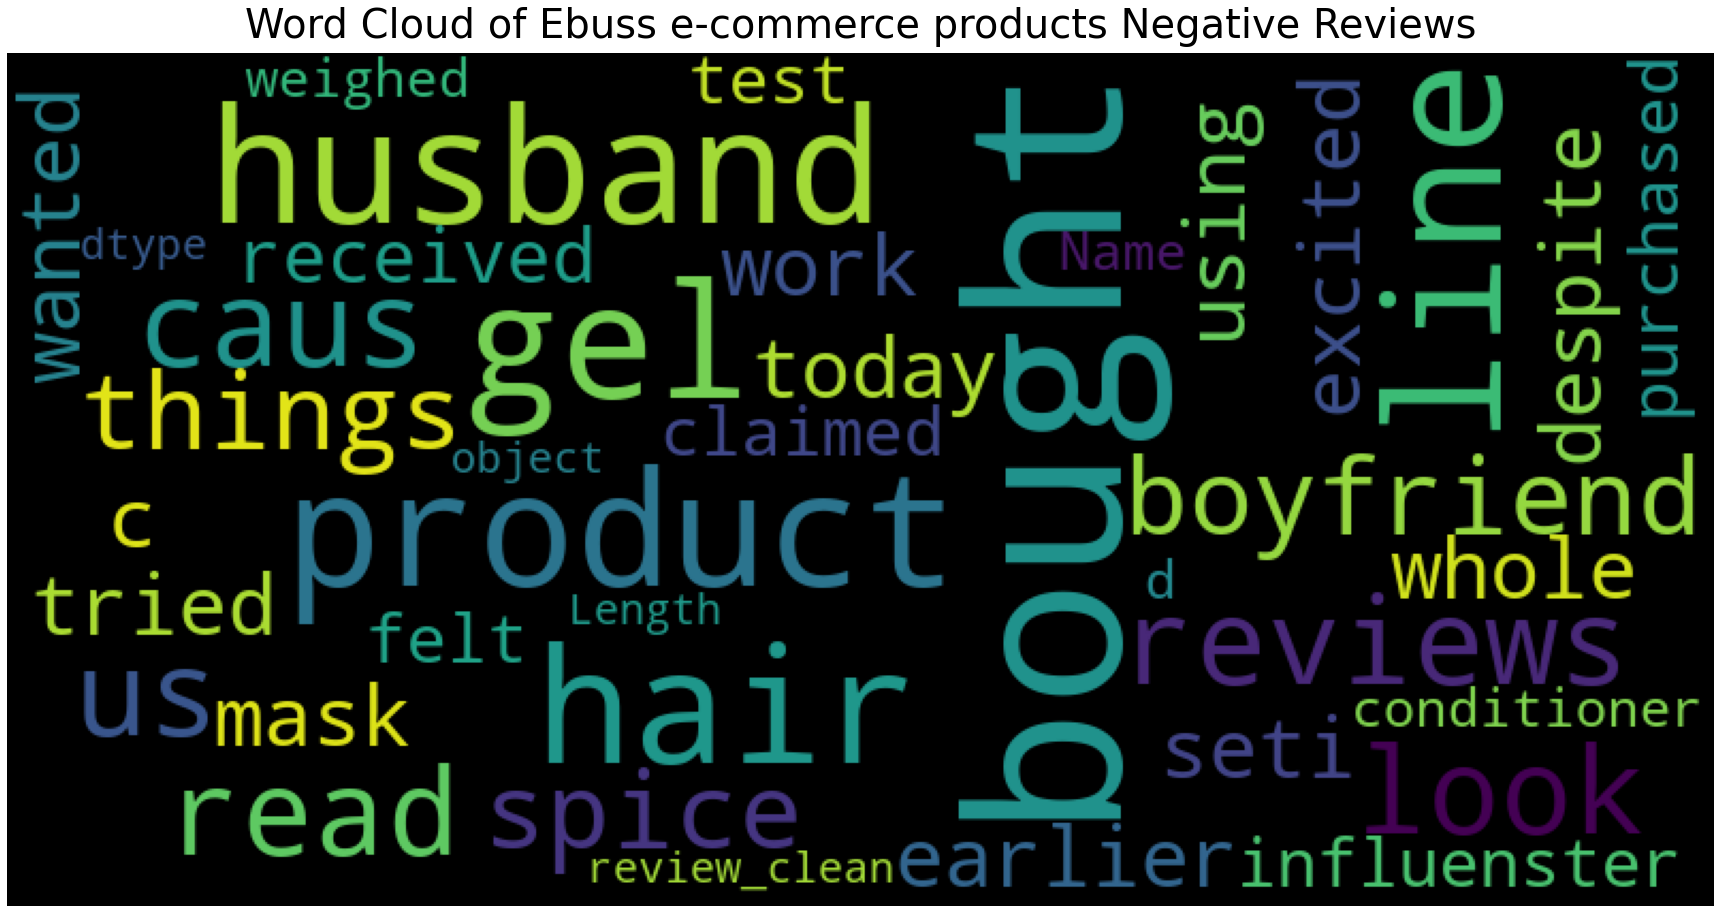

In [55]:
# to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Ebuss e-commerce products Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

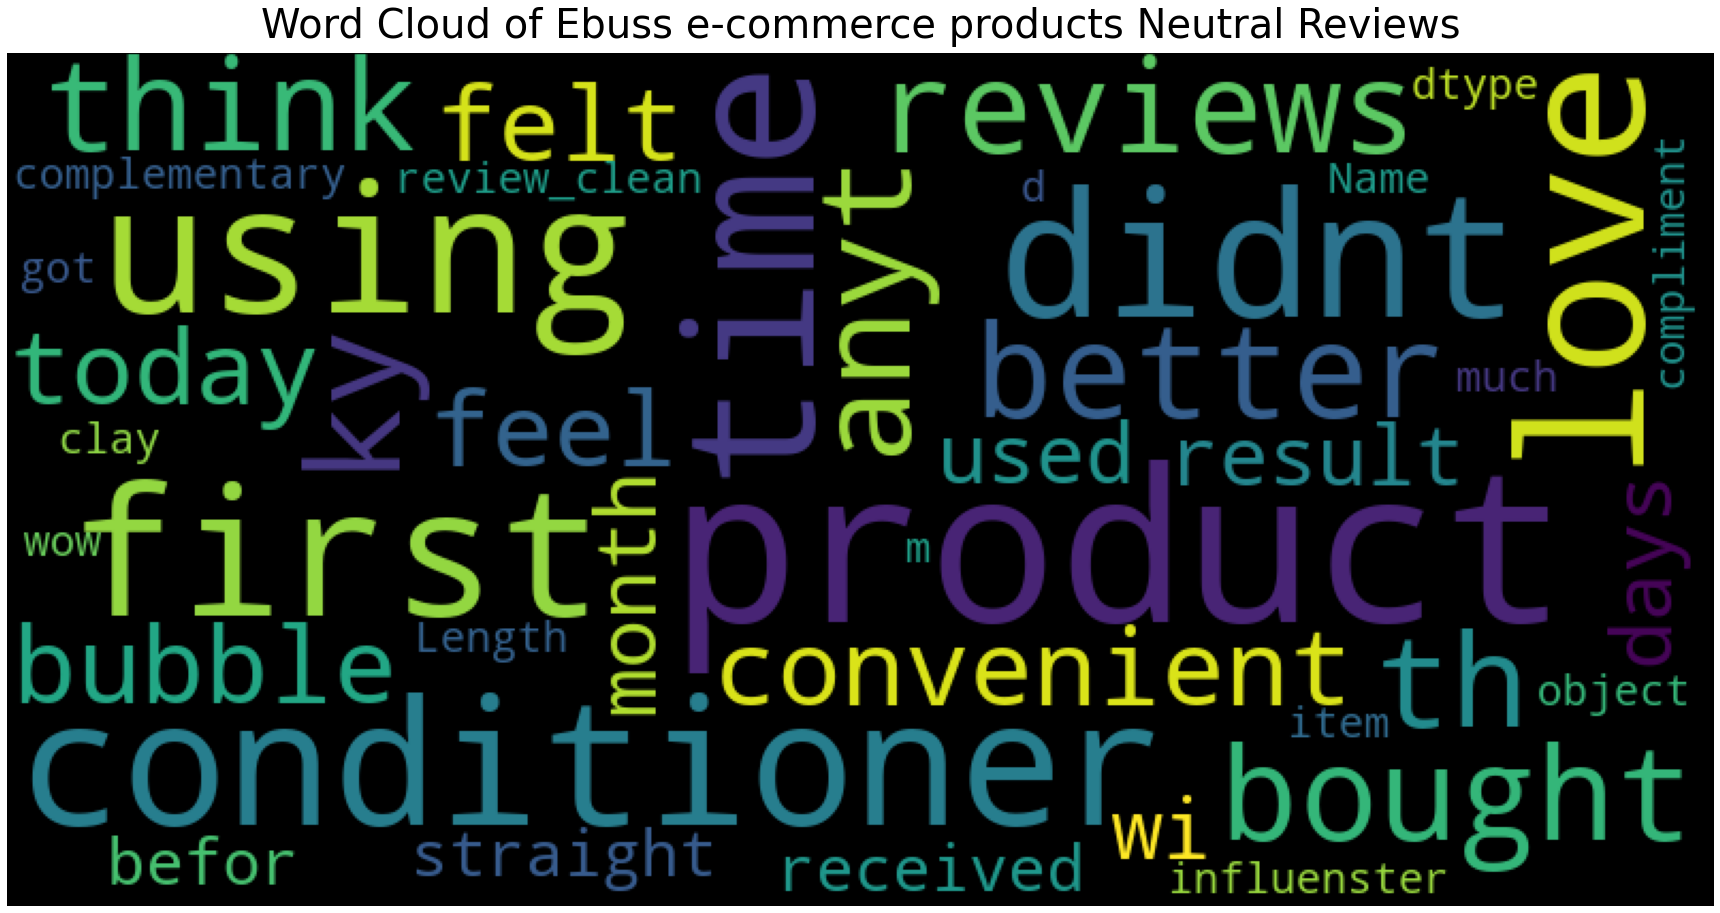

In [56]:
# to see neutral wordcloud
wordcloud.generate(str(df_notr['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Ebuss e-commerce products Neutral Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

# Another Way to Look Most Common Positive and Negative Words

Wordclouds give general idea about what is text about but I need more characteristic words because all words are not in the same text in this data. I will try another method to look common words in positive and negative dataframes.

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swammy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

## Top 20 Common Words List in Positive Reviews

In [59]:
word_frequency=word_count(df_pos['review_clean']) #tokenize and count and create dictionary

In [60]:
# to create dataframe from most common words dictionary

df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [61]:
stop = set(stopwords.words("english")) #setting stopwords

I will create new column as word_without_stop and drop the row if it contains stopwords.

In [62]:
# taking only words which are not stopwords
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [63]:
# dropping stop words columns
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [64]:
# taking top 25 words
df_top_20_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(20)

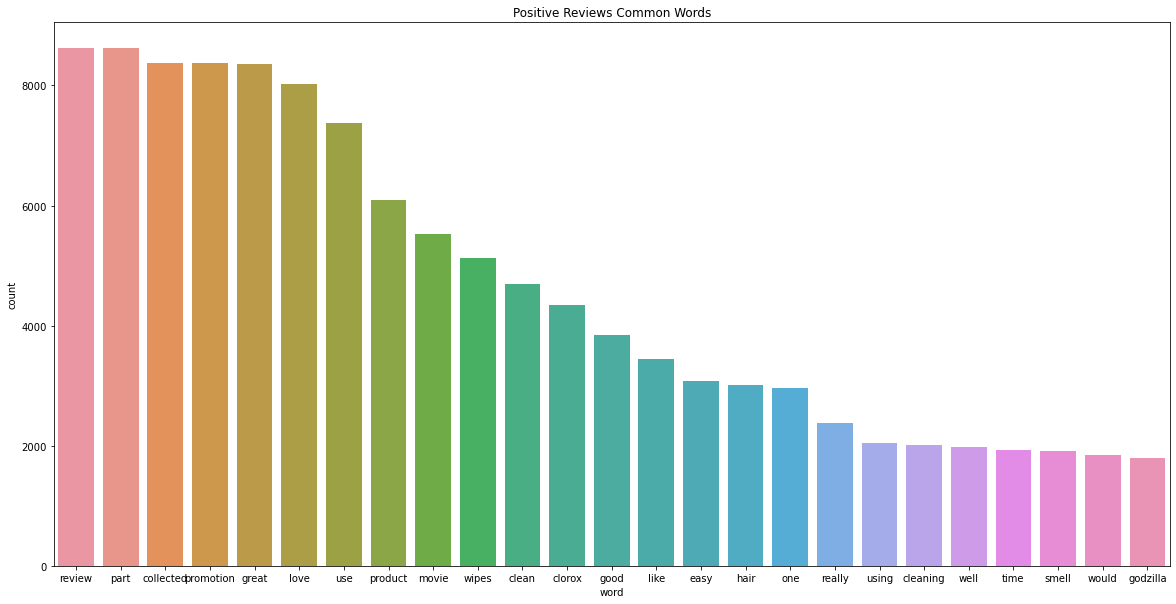

In [65]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot("word","count", data=df_top_20_pos)

# Top 20 Common Words List in Negative Reviews

I will do same steps with positive words for negative words.

In [66]:
word_frequency_neg=word_count(df_neg['review_clean'])

In [67]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)


In [68]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [69]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])

In [70]:
df_top_20_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(20)

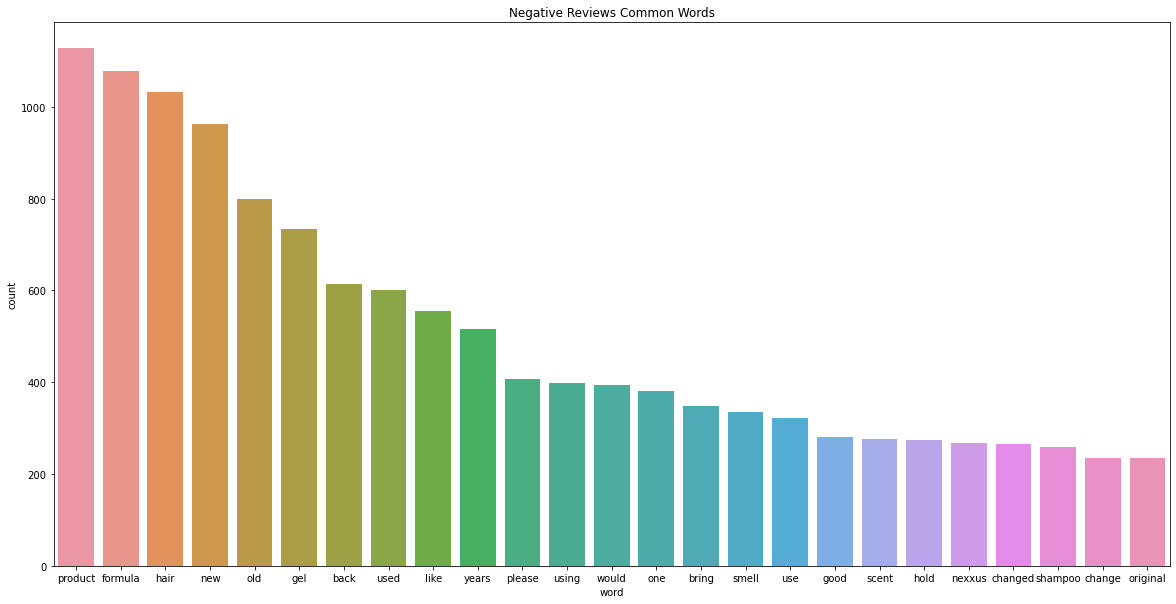

In [71]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot("word","count", data=df_top_20_neg)

# Top 20 Common Words List in Neutral Reviews

I will do same step with negative and positive for neutral.

In [72]:
word_frequency_notr = word_count(df_notr['review_clean'])

In [73]:
df_nt_count = pd.DataFrame(columns=['word', 'count'])
df_nt_count['word'] = word_frequency_notr.keys()
df_nt_count['count'] = list(word_frequency_notr.values())
df_nt_count=df_nt_count.sort_values(by=['count'], ascending=False)
df_nt_count=df_nt_count.reset_index(drop=True)

In [74]:
df_nt_count['word_without_stop'] = df_nt_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [75]:
df_nt_without_stop = df_nt_count.dropna(subset=['word_without_stop'])

In [76]:
df_top_20_nt = df_nt_count.loc[df_nt_count['word_without_stop']!=''].head(20)

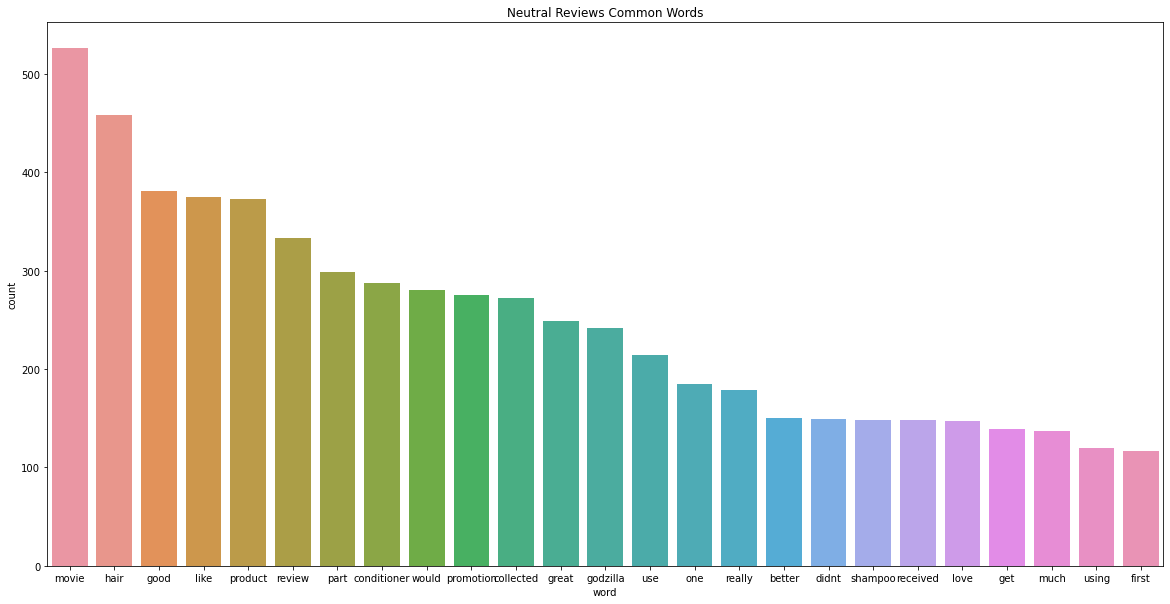

In [77]:
plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot("word","count", data=df_top_20_nt)

'movie' and 'product' are most common words in 3 dataframe. 'hair' is 3rd rank for positive and neutral, but for negative 'like' is in the 3rd rank. Most probably, the reason is that computer counts every word and removes stop words such as 'did not'. If the most common words are 'did not like' for negative, it is counted as 'like'. To handle this problem, I will use bi-grams for modeling which takes the words as couple.

# Simple LogReg 

My aim in this project to use machine learning and deep learning techniques for classifing the text. But, to look at the 3-class target simple model, I will use simple LogReg. 

## Taking Sample and Train-Test Split

In [78]:
df['user_sentiment'].value_counts()

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

### Taking 50000 Samples from Each Class

In [79]:
df_0 = df.loc[df['user_sentiment']==0].head(50000)

In [80]:
df_1 = df.loc[df['user_sentiment']==1].head(50000)

In [81]:
df_2 = df.loc[df['user_sentiment']==2].head(50000)

In [82]:
frames = [df_0, df_1, df_2]
#getting together samples
df_sampled = pd.concat(frames)

In [83]:
df_sampled['user_sentiment'].value_counts() #sample classes - balanced chosen

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

In [84]:
from sklearn.metrics import plot_confusion_matrix

In [85]:
def model(df) :
    '''This function splits data to train and test, then vectorized reviews 
        and calculating results from LogReg
    '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['user_sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    # choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    

In [86]:
model(df_sampled)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.8687465928628338
TEST: 0.83160013418316

Balanced Accuracy:
TRAIN: 0.9109511360288488
TEST: 0.7239826192332462


C:\Users\swammy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


My model is overfit and there is no high accuracy which I want. I can tune this model to handle this but my aim in this project is to determine negative reviews mostly and for doing this I will try also deep learning models. I did LogReg just for first idea. So, I drop this here and continue with binary class machine learning and deep learning models which can be found in this [repo](https://github.com/ezgigm/sentiment_analysis_and_product_recommendation/tree/master/notebooks).

In [87]:
df.to_csv('sample30.csv', index = False) # to keep merged,preprocessed and cleaned version

# Findings and Explorations

## Cleaning Process

- The data has lots of null values for some features, and some unnecessary columns for modeling. Our main column is 'reviewText' column so I dropped the nulls for this column.
- Unnecessary columns were dropped such as image, vote etc.
- Upper case letters were changed to lower case in reviews and punctuations were cleaned. 
- The rows which style's are different than Kindle edition were deleted.

## Explorations & Findings

- There are 30000 reviews with their ratings in my data.
- Data consists of 252 user and 24787 reviews ratings mainly.  
- My target is highly imbalanced with 4 and 5 ratings are significantly higher than others.
- Data contains balanced points for each day and month. Distribution of the labels also looks similar for each month.
- Top users according to review numbers generally rated products more than 3.
- Although, some products has 5 rating average, their review numbers are less so instead of looking rating average, I preferred to look highly reviewed product. 
- Top reviewed product is Clorox Disinfecting Wipes Value Pack Scented 1...	with 10584 reviews and 4.82 rating average in my data. 
- Mostly common words are same in each rated segments, but ranks are different. Some negative words such as didnt and dont are in the most common words in negative reviews dataframe different than positive reviews dataframe. 
- 'hair' and 'like' also have higher ranks in negative reviews than positive reviews. The reason can be that they could be commonly in reviews with 'not'.

# Binary-Classification with ML Models

## Aim of This Notebook

In [88]:
#!pip install mlxtend
#!pip install xgboost
#!pip install lightgbm

## Taking Samples for Modeling

My target is highly unbalanced. To teach my model more about minority class, I will take sample data from each classes balanced.

In [89]:
def calc_two_sentiment(reviews_rating):
    '''This function encodes the rating 1 and 2 as 0, others as 1'''
    if reviews_rating >= 3:
        return 1
    else:
        return 0

In [90]:
df['user_sentiment'] = df['reviews_rating'].apply(calc_two_sentiment) # appyling converter to change sentiments from 3 to 2-classed

In [91]:
df['user_sentiment'].value_counts()

1    28026
0     1783
Name: user_sentiment, dtype: int64

In [92]:
df_0 = df.loc[df['user_sentiment']==0].head(50000)

In [93]:
df_1 = df.loc[df['user_sentiment']==1].head(50000)

In [94]:
frames = [df_0, df_1]
#getting together samples
df_sampled = pd.concat(frames)

In [95]:
df_sampled['user_sentiment'].value_counts() #sample classes - balanced chosen

1    28026
0     1783
Name: user_sentiment, dtype: int64

# Modeling Functions

I will use functions for my modeling and spliting parts because I want to get results easily when I changed something in model.

In [96]:
def model_split(df) :
    '''This function splits data to train and test, then vectorized reviews '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['user_sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features - tranforming to suitable format for modeling
    train_word_features = word_vectorizer.transform(X_train) 
    test_word_features = word_vectorizer.transform(X_test)
    
    return train_word_features , test_word_features, y_train, y_test 

def model(df,classifier):
    '''this function gives modeling results and confusion matrix also'''
    train_word_features,test_word_features,y_train,y_test = model_split(df)
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
    
    #for smart printing (learned from our lead instructor Bryan Arnold)
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    

In [97]:
# choosing classifier and running model
classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
model(df_sampled,classifier)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.9536629345410325
TEST: 0.9381080174438108

Balanced Accuracy:
TRAIN: 0.9608285126232914
TEST: 0.8850307089815747


With simple Logreg, I got my baseline model for 2-balanced class data. I do not work on too much this model, because it is my baseline. I will decide after other models. My main concern is this matrix are wrong predictions on 0. I will try to find the best results according to accuracy and true 0 class predictions. 

### One More Check to See roc-auc Score with Cross-Val

In [98]:
# vectorize data for calculation
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

word_vectorizer.fit(df_sampled['review_clean'])
    
word_features = word_vectorizer.transform(df_sampled['review_clean'])

scores = cross_val_score(classifier, word_features, df_sampled['user_sentiment'], cv=3, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9277670151797537 +/- 0.04463525193377608


I have pretty good results for baseline.

# Decision Tree Classifier

Decision tree classifier is a supervised classification technique which splits data according to certain parameters continuously.

In [99]:
des_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, random_state=42, class_weight='balanced')
model(df_sampled,des_tree)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.9606239778588501
TEST: 0.961590070446159

Balanced Accuracy:
TRAIN: 0.7070451779010947
TEST: 0.6933852639688416


I do not find better results than baseline when I try to tune this model, so I continue to try other models. With simple Logreg, my test accuracy was 0.94, but this one gives 0.69.

# Extra-Trees Classifier

Extra Trees works like a Random Forest. It builds multiple trees and splits nodes using random subsets of features. There are two main differences it does not samples without replacement, and nodes are split on random splits, not best splits. I also used different parameters and tuned them manually.

In [100]:
rf_extra = ExtraTreesClassifier(max_depth=5, criterion= 'entropy', min_samples_leaf=3, min_samples_split=18, random_state=42, n_estimators = 100, class_weight='balanced', n_jobs = -1)

model(df_sampled,rf_extra)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.9277057910848324
TEST: 0.9288829251928883

Balanced Accuracy:
TRAIN: 0.8203591231524681
TEST: 0.8078682402790558


I got better than decision tree but not better than baseline.

# Random Forest Classifier

Random forest models can reduce overfitting risk by randomness as building n_estimators, bootstrapping sample and splitting nodes on the best split among a random subset of the features selected at every node and converting non-homogeneous node into best possibles.

In [101]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced', criterion = 'entropy',max_features = 'sqrt',min_samples_split = 5)
model(df_sampled,rf)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.9997483960246571
TEST: 0.972660181147266

Balanced Accuracy:
TRAIN: 0.9998660475084837
TEST: 0.7644385713368572


Random forest give high accuracy but it is overfit. It could not split my target well. I can find best parameters for my model and tune it with grid search. But, it took too much time, so I prefered to changed parameters manually and run for each time. I got the best results with this parameters. There is grid search code below to show how to find best parameters and best score.

 grid_p = {"n_estimators": [20, 50, 100],
           "criterion": ["gini", "entropy"],
           "max_features": ['sqrt', 'log2'],
           "min_samples_split": [2, 5, 10]}

 grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=3, scoring='roc_auc')
 grid_search.fit(word_features, df_sampled['user_sentiment'])

grid_search.best_score_

best_rf = grid_search.best_estimator_

# XGBoost Classifier

XGBoost is an efficient and flexiable classifier which implements models with Gradient Boosting. Although, it is very usefull classifier, it can be overfit easily. So, parameter selection is very imporant for XGBoost. I can do grid search also for XGBoost to tune our parameters but it takes too much time. So, I played around our parameters manually and decided the best one.

In [102]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror',early_stopping_rounds=10,
                        eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1,
                        max_delta_step=1)
model(df_sampled, xgb)

(23847,)
(5962,)


C:\Users\swammy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopping_rounds", "maximize", "nrounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:
TRAIN: 0.9852392334465552
TEST: 0.972660181147266

Balanced Accuracy:
TRAIN: 0.8787043418332185
TEST: 0.7658557854865287


It gives good results but not better than baseline. The most important parameters are learning rate, early stopping round, max_depth and max_delta step for my tuning. When I changed them, results significantly changed. So, I set this parameters according to results which I found.

# LGBM Classifier

LGBM also constructs a gradient boosting model. It has some advantages that faster training speed and higher efficiency with lower memory usage. It is capable large data sets with significantly quicker than XGBoost. So, I tried this one also.

In [103]:
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 10, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)
model(df_sampled, lgbm)

(23847,)
(5962,)
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
Accuracy:
TRAIN: 0.9744621965027047
TEST: 0.9708151626970816

Balanced Accuracy:
TRAIN: 0.7978790763192551
TEST: 0.7577928053243168


It gives higher than 80% but lower than baseline.

In [104]:
# to keep results and see in dataframe
df_results = pd.DataFrame(columns=["Model", 'train_balanced', 'test_balanced']) # to see all results

In [105]:
df_results = df_results.append({       # writing results to df
     "Model": 'Logreg' ,
               'train_balanced' : 0.96,
                    'test_balanced' : 0.88}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Decision Tree' ,
               'train_balanced' : 0.96,
                    'test_balanced' : 0.88}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Extra-Tree' ,
               'train_balanced' : 0.83,
                    'test_balanced' : 0.81}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Random Forest' ,
               'train_balanced' : 0.99,
                    'test_balanced' : 0.76}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'XGBM' ,
               'train_balanced' : 0.88,
                    'test_balanced' : 0.76}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'LGBM' ,
               'train_balanced' : 0.79,
                    'test_balanced' : 0.75}, ignore_index=True)


In [106]:
df_results

,Model,train_balanced,test_balanced
0,Logreg,0.96,0.88
1,Decision Tree,0.96,0.88
2,Extra-Tree,0.83,0.81
3,Random Forest,0.99,0.76
4,XGBM,0.88,0.76
5,LGBM,0.79,0.75


According to results, my baseline did better than others. I can work on to tune these models and can get better results. But, I would like to try and see how deep learning models will do. So, I drop it here and continue to model with NN.

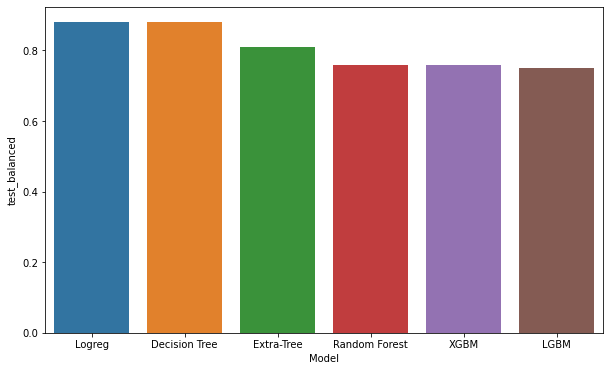

In [107]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y= 'test_balanced',data=df_results)

If I will not get good results with deep learning, the ideas below can be tried; 
- Gradient boost models can be tuned.
- Grid search can be done.
- I can come back to text column and do deeper analysis and cleaning and feature engineering.

# Ebuss Product Recommendations

## Choosing 1000 users - 1000 books

Firstly, I would like to see users review numbers and books review numbers.

In [108]:
# creting new column which consists of reviewer numbers of user
df['Reviewer_Count'] = df['id'].map(df['id'].value_counts())

In [109]:
# creating new column for review numbers of products
df['Book_Count'] = df['brand'].map(df['brand'].value_counts())

In [110]:
df = df.sort_values(by=['Reviewer_Count'],ascending=False)

In [111]:
df.reset_index(drop=True,inplace=True)

In [112]:
df.isna().sum() # to check title column

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     13877
reviews_doRecommend      2404
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        27881
reviews_userProvince    29642
user_sentiment              0
review_clean                0
Reviewer_Count              0
Book_Count                  0
dtype: int64

I want to give information with movie titles, so I will drop the reviews which do not have titles. In this data, 'brand' shows the movie ID. If the title is not found in meta data, it is shown as null. So, I will drop them to see titles.

In [113]:
df.dropna(subset=['reviews_title'], inplace=True) # dropping without title columns

# Taking Samples 

I will have 2 sampled data to compare recommandation results at the end. In this notebook, I will use df_1000 which contains approximately 1000 user and 1000 movies.

In [114]:
df_100 = df.loc[df['Reviewer_Count']>150] 

In [115]:
df_1000 = df_100.loc[df_100['Book_Count']>150]

In [116]:
df_1000['id'].nunique()

30

In [117]:
df_1000['brand'].nunique()

29

In above cells, I select users who have more than 150 reviews. Also between them, I select movies which have more than 150 reviews.

In [118]:
df_200=df.loc[df['Reviewer_Count']>100]

In [119]:
df_2000 = df_200.loc[df_200['Book_Count']>100]

I also take more than 100 reviews for each same way to keep more big sample.

In [120]:
df_1000.to_csv('df_1000.csv',index = False) # writing to csv for later use

In [121]:
df_2000.to_csv('df_2000.csv',index = False) # writing to csv for later use

# Two Main Recommendation Systems

In [122]:
# taking pivot table of user-item

pivot = pd.pivot_table(df_1000, index='id', columns=['brand'], values='reviews_rating').fillna(0)

pivot.head(5)

brand,Aveeno,Avery,Burt's Bees,Chester's,Clear Scalp & Hair Therapy,Clorox,Coty,Disney,FOX,Hoover,Hormel,Just For Men,L'oreal Paris,Lionsgate,Lundberg,Lysol,Nexxus,Olay,Pendaflex,Sony Pictures,Storkcraft,Summit Entertainment,Tostitos,Universal Home Video,Vaseline,Warner Bros.,Warner Home Video,Warner Music Group,Windex
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,4.12931
AV1l8zRZvKc47QAVhnAv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.690852,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
AVpe31o71cnluZ0-YrSD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.226721,0.0,0.0,0.00000
AVpe41TqilAPnD_xQH3d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.303831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000
AVpe59io1cnluZ0-ZgDU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.491018,0.0,0.000000,0.0,0.0,0.00000


In [123]:
# changing pivot table to matrix
pivot_mat = pivot.to_numpy()

pivot_mat[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 4.12931034],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.69085174, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [124]:
# My reviewer id column is index, so I turned it to list
reviewer_id = list(pivot.index)
reviewer_id[:10]

['AV1YGDqsGV-KLJ3adc-O',
 'AV1l8zRZvKc47QAVhnAv',
 'AVpe31o71cnluZ0-YrSD',
 'AVpe41TqilAPnD_xQH3d',
 'AVpe59io1cnluZ0-ZgDU',
 'AVpe8gsILJeJML43y6Ed',
 'AVpe9W4D1cnluZ0-avf0',
 'AVpf0eb2LJeJML43EVSt',
 'AVpf2tw1ilAPnD_xjflC',
 'AVpf385g1cnluZ0-s0_t']

In [129]:
import random
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from scipy import sparse
from scipy.stats import pearsonr
import re

In [130]:
# Sparcing pivot matrix 
sparse_matrix = csr_matrix(pivot_mat)

sparse_matrix

<30x29 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

I created sparce matrix because lots of the values in pivot matrix is zero (if user have no rating on that movie, it is shown as zero). So, different than dense matrix which stores all values, sparse matrix keeps non-zero values according to row and column indices.

In [133]:
# factor numbers of the user-item matrix

factor_n = 15

# matrix factorization of the user-item matrix

U, sigma, V = svds(sparse_matrix, k = factor_n) #defining elements of the factorization

In [134]:
# to see and check the dimensions of matrix
print(U.shape)
print(V.shape)
sigma = np.diag(sigma)
print(sigma.shape)

(30, 15)
(15, 29)
(15, 15)


In [135]:
# dot product of matrix
pred_rating = np.dot(np.dot(U,sigma),V)

pred_rating[:5]

array([[ 5.02100879e-31,  2.26520916e-16, -9.07518785e-16,
         5.93685885e-16, -1.03638621e-30,  9.33329556e-16,
         4.62057869e-16, -1.98681156e-15,  7.18770972e-31,
        -3.18614236e-30,  1.96204673e-30,  2.18417118e-31,
        -1.09386277e-31,  4.43704023e-16,  3.96177805e-17,
        -2.04498503e-16, -2.44213711e-34, -5.21628567e-16,
         1.42056455e-31, -2.16982011e-16,  2.29712036e-31,
         3.53343471e-17,  1.38635963e-15, -8.54486683e-31,
        -3.92374789e-16, -2.94444388e-31, -1.66728141e-30,
         1.90421399e-15,  3.03248149e-30],
       [ 3.16197397e-16, -1.17199005e-17, -9.90792054e-17,
        -5.24005827e-16, -1.51183412e-16, -2.82026667e-16,
        -5.36378870e-16,  2.57006880e-17, -3.26664653e-16,
        -7.01231892e-17,  8.09307363e-19, -3.86363728e-16,
         6.74941313e-17,  1.41452571e-16,  3.87338385e-17,
        -2.83742804e-16, -2.07804526e-16,  4.69085174e+00,
        -5.34429660e-16, -1.64791434e-16, -6.17021634e-16,
         3.90

I need to normalize my matrix before recommending because of zero values.

In [136]:
# normalizing matrix
pred_rating_n = (pred_rating - pred_rating.min()) / (pred_rating.max() - pred_rating.min())

In [137]:
pred_rating_n[:5]

array([[1.50045620e-15, 1.54682706e-15, 1.31467898e-15, 1.62198902e-15,
        1.50045620e-15, 1.69151713e-15, 1.59504359e-15, 1.09373807e-15,
        1.50045620e-15, 1.50045620e-15, 1.50045620e-15, 1.50045620e-15,
        1.50045620e-15, 1.59128639e-15, 1.50856632e-15, 1.45859353e-15,
        1.50045620e-15, 1.39367416e-15, 1.50045620e-15, 1.45603804e-15,
        1.50045620e-15, 1.50768946e-15, 1.78425644e-15, 1.50045620e-15,
        1.42013357e-15, 1.50045620e-15, 1.50045620e-15, 1.89026587e-15,
        1.50045620e-15],
       [1.56518464e-15, 1.49805703e-15, 1.48017380e-15, 1.39318751e-15,
        1.46950760e-15, 1.44272282e-15, 1.39065464e-15, 1.50571736e-15,
        1.43358502e-15, 1.48610136e-15, 1.50062188e-15, 1.42136409e-15,
        1.51427286e-15, 1.52941281e-15, 1.50838537e-15, 1.44237151e-15,
        1.45791675e-15, 9.60259381e-01, 1.39105366e-15, 1.46672192e-15,
        1.37414635e-15, 1.58041536e-15, 1.51826101e-15, 1.39142216e-15,
        1.55942924e-15, 1.66487292e-15,

In [138]:
# Assigning reconstructed matrix to df
pred_df = pd.DataFrame(pred_rating_n, columns = pivot.columns, index=reviewer_id).transpose()
pred_df.head(10)

,AV1YGDqsGV-KLJ3adc-O,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpf0eb2LJeJML43EVSt,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf63aJLJeJML43F__Q,AVpf9pzn1cnluZ0-uNTM,AVpfBrUZilAPnD_xTUly,AVpfJP1C1cnluZ0-e3Xy,AVpfM_ytilAPnD_xXIJb,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfm8yiLJeJML43AYyu,AVpftikC1cnluZ0-p31V
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aveeno,1.500456e-15,1.565185e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.359960e-15,1.275193e-15,1.500456e-15,1.547842e-15,1.511123e-15,1.251525e-15,1.205399e-15,1.368032e-15,1.537651e-15,1.361530e-15,1.548036e-15,1.453782e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.709765e-15,1.582325e-15,1.324158e-15,1.500456e-15,1.500456e-15,1.564733e-15,1.500456e-15,1.500456e-15
Avery,1.546827e-15,1.498057e-15,1.467761e-15,1.535125e-15,2.531159e-15,1.458725e-15,1.731555e-15,1.503256e-15,1.482593e-15,1.736466e-15,1.519290e-15,1.000000e+00,1.544533e-15,1.520953e-15,1.553144e-15,1.498771e-15,1.483446e-15,1.519367e-15,1.510985e-15,1.505653e-15,1.507956e-15,1.496433e-15,1.520317e-15,1.469694e-15,1.504773e-15,1.571822e-15,1.562962e-15,1.573019e-15,1.482021e-15,1.530041e-15
Burt's Bees,1.314679e-15,1.480174e-15,1.278722e-15,6.082525e-16,1.275408e-15,1.214427e-15,1.642459e-15,1.468397e-15,1.345759e-15,1.794533e-15,1.573511e-15,1.555799e-15,1.471904e-15,1.544994e-15,9.520256e-01,1.491818e-15,1.345374e-15,1.573809e-15,1.635290e-15,1.483789e-15,1.402661e-15,1.743137e-15,1.667039e-15,1.527882e-15,1.533253e-15,1.047186e-15,1.280119e-15,1.583872e-15,1.500951e-15,1.471535e-15
Chester's,1.621989e-15,1.393188e-15,1.518510e-15,1.515075e-15,2.109314e-15,1.502894e-15,1.369358e-15,1.781669e-15,1.461514e-15,1.544286e-15,1.522792e-15,1.521233e-15,1.400404e-15,9.865353e-01,1.543436e-15,1.603486e-15,1.434982e-15,1.522883e-15,1.585798e-15,1.562513e-15,1.290178e-15,1.595392e-15,1.543607e-15,1.471526e-15,1.279423e-15,1.684177e-15,1.505847e-15,1.538157e-15,1.507376e-15,1.396482e-15
Clear Scalp & Hair Therapy,1.500456e-15,1.469508e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.884402e-15,1.319749e-15,1.500456e-15,1.257021e-15,1.509409e-15,1.442788e-15,1.605924e-15,1.473121e-15,1.495221e-15,1.450778e-15,1.256028e-15,1.548929e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.418200e-15,1.339815e-15,1.762350e-15,1.500456e-15,1.500456e-15,1.449041e-15,1.500456e-15,1.500456e-15
Clorox,1.691517e-15,1.442723e-15,1.359257e-15,1.369564e-15,1.514196e-15,1.475114e-15,1.596330e-15,1.422945e-15,1.533735e-15,1.592602e-15,9.867911e-01,1.519542e-15,1.489890e-15,1.522786e-15,1.570937e-15,1.470302e-15,1.332990e-15,9.908155e-01,1.532240e-15,1.357258e-15,1.534218e-15,1.451094e-15,1.396010e-15,1.579643e-15,1.513340e-15,1.680715e-15,1.382258e-15,1.468668e-15,1.475391e-15,1.810654e-15
Coty,1.595044e-15,1.390655e-15,1.528546e-15,1.571143e-15,1.605306e-15,1.133807e-15,1.992461e-15,1.501552e-15,1.794055e-15,2.077530e-15,1.326686e-15,1.482570e-15,1.579040e-15,1.432535e-15,1.345205e-15,1.517322e-15,9.509897e-01,1.325977e-15,1.254855e-15,1.470133e-15,1.397747e-15,1.794392e-15,1.468196e-15,1.491179e-15,1.536137e-15,1.381995e-15,1.764953e-15,1.444113e-15,1.495569e-15,1.436113e-15
Disney,1.093738e-15,1.505717e-15,1.715755e-15,1.531869e-15,1.941031e-15,1.466681e-15,2.589760e-15,1.464057e-15,1.455371e-15,8.967435e-16,1.513733e-15,1.504964e-15,1.549218e-15,1.272740e-15,1.533063e-15,1.482814e-15,1.535892e-15,1.513787e-15,1.504957e-15,1.659211e-15,1.371015e-15,2.157558e-15,1.564721e-15,1.621322e-15,9.575850e-01,1.851941e-15,1.758599e-15,1.519347e-15,1.494073e-15,1.825613e-15
FOX,1.500456e-15,1.433585e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.500456e-15,1.720598e-15,6.108750e-16,1.500456e-1

Now, I can have the SVD latent factorization of each user for each item. It is time for recommendation function.

In [139]:
def recommend_items(user_id ,pred_df, items_df, items_to_ignore=[], top_list=20, verbose=False):
        '''this function find the most related items'''
        # taking and sorting the user's predictions
        sorted_user_predictions = pred_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        recommendations_df = sorted_user_predictions[~sorted_user_predictions['brand'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(top_list)

        return recommendations_df
    

'Recstrength' shows the how much our prediction is strength.

In [140]:
def recommender(user_id,pred_df,real_df,df):
    '''this functions merges the title with corresponding book id and finding the 
        empty rows which means does not read by user and priting results'''
        
    recommend = recommend_items(user_id, pred_df,real_df)
    df_user= real_df.loc[real_df['id'] == user_id]
    new_df = df_user.merge(recommend, how = 'outer', left_on = 'brand', right_on = 'brand')
    rec_df = new_df.loc[new_df['reviews_rating'].isnull()==True]
    df_rec_t = rec_df.loc[:, ['brand', 'recStrength']]
    df_last = pd.merge(df_rec_t,df[['reviews_title','brand']],on=['brand'], how='left') 
    return df_last

# Getting Recommendations

When I try my recommender system it gives me recommended books. Maybe strength looks not well, but it is expected because I am working now only the small subset of original data. My aim is to build a system, if systems works for this subset, it can be run in more strong computers.

In [141]:
recommender('AV1YGDqsGV-KLJ3adc-O',pred_df,df_1000,df)

,brand,recStrength,reviews_title
0,Warner Music Group,1.890266e-15,Great music!
1,Warner Music Group,1.890266e-15,CD purchase
2,Warner Music Group,1.890266e-15,Great album
3,Warner Music Group,1.890266e-15,Great
4,Warner Music Group,1.890266e-15,fill with hits
...,...,...,...
18328,Universal Home Video,1.500456e-15,Good movie
18329,Universal Home Video,1.500456e-15,Funny!
18330,Universal Home Video,1.500456e-15,Funny
18331,Universal Home Video,1.500456e-15,Great movie


# Another Technique

Now, I will use cosine similarity tool of scikit learn library directly and build a user-based recommender.

In [142]:
user_sparse_pivot = sparse.csr_matrix(pivot.fillna(0))
user_recommender = pw.cosine_similarity(user_sparse_pivot)

In [143]:
# normalizing zero values 
pred_rating_n_cos = (user_recommender - user_recommender.mean())/ (user_recommender.max() - user_recommender.min())

In [144]:
user_recommender_df = pd.DataFrame(pred_rating_n_cos, columns=pivot.index.values,index = pivot.index.values)

In this method, I have user-user matrix, which shows relations of them, now I will change it to get recommendations.

In [145]:
user_recommender_df.head(3)

,AV1YGDqsGV-KLJ3adc-O,AV1l8zRZvKc47QAVhnAv,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpf0eb2LJeJML43EVSt,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf4oLxLJeJML43FcxC,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf63aJLJeJML43F__Q,AVpf9pzn1cnluZ0-uNTM,AVpfBrUZilAPnD_xTUly,AVpfJP1C1cnluZ0-e3Xy,AVpfM_ytilAPnD_xXIJb,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfm8yiLJeJML43AYyu,AVpftikC1cnluZ0-p31V
AV1YGDqsGV-KLJ3adc-O,0.964444,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556
AV1l8zRZvKc47QAVhnAv,-0.035556,0.964444,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556
AVpe31o71cnluZ0-YrSD,-0.035556,-0.035556,0.964444,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556,-0.035556


In [146]:
def recommend2(user_recommender_df,user_id,df):
    '''This function finds the top-2 similar users first,
    then it takes the mean of their ratings to books and sorted books according to mean values of books
    '''
    user_cosine_df = pd.DataFrame(user_recommender_df[user_id].sort_values(ascending=False))
    user_cosine_df.reset_index(level=0, inplace=True)
    user_cosine_df.columns = ['brand','cosine_sim']
    
    # for 2-similar users
    similar_user = list(user_cosine_df['brand'][1:3].values)
    similar_user_df = pivot.T[[user_id] + similar_user]
    similar_user_df['mean'] = similar_user_df[similar_user].mean(numeric_only=True,axis=1)
    similar_user_df.sort_values('mean', ascending=False,inplace = True)
    
    #taking top 10 books from similar users and merging them
    book_top10 = similar_user_df[similar_user_df[user_id]==0].head(10)
    df_last1 = pd.merge(book_top10,df[['reviews_title','brand']],on=['brand'], how='left') 
    return df_last1

In [147]:
recommend2(user_recommender_df,'AV1YGDqsGV-KLJ3adc-O',df)

,brand,AV1YGDqsGV-KLJ3adc-O,AVpfm8yiLJeJML43AYyu,AV1l8zRZvKc47QAVhnAv,mean,reviews_title
0,Olay,0.0,0.0,4.690852,2.345426,Excellent Product!
1,Olay,0.0,0.0,4.690852,2.345426,This product smells amazing
2,Olay,0.0,0.0,4.690852,2.345426,looking young healthy
3,Olay,0.0,0.0,4.690852,2.345426,The Fountain of Youth
4,Olay,0.0,0.0,4.690852,2.345426,You will be amazed at the actual benefits of O...
...,...,...,...,...,...,...
6985,Tostitos,0.0,0.0,0.000000,0.000000,love these
6986,Tostitos,0.0,0.0,0.000000,0.000000,Chips
6987,Tostitos,0.0,0.0,0.000000,0.000000,loving it
6988,Tostitos,0.0,0.0,0.000000,0.000000,Simply the Best


When we look at these 2 different recommendations, it is shown that they recommends different movies. When we change our system, results have changed. There are many ways to compare results in recommendation systems. As a future plan, I will add comparing metric to my systems. 

# Model Deployment

In [149]:
import pickle

pickle.dump(classifier,open('model.pkl','wb'))
# Dump this model by the name "model.pkl" in the systems HDD and
# while doing this, write this file using "write bytes" mode.

# Client Side 

In [150]:
client_model = pickle.load(open("model.pkl","rb"))